In [203]:
#packages
import numpy as np
from scipy import linalg as ls 
import networkx as nx 
from functools import reduce
from tqdm import tqdm
import source_file as sf
import matplotlib.pyplot as plt
import matplotlib as mpl 


mpl.rcParams['font.family'] = 'serif' #'Times New Roman'
mpl.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1

#Set options for later computations - we will probably not need this!
#options = Options(nsteps=int(1e6), normalize_output=False, atol=1e-9, rtol=1e-7)
#Function to change the plot axes, set the plot range, and tick mark intervals. 
#Function takes in an axis object, and the plot range in the form of a list [[x_min, x_max],[y_min, y_max]], and 
#tick marks [x ticks major interval, x ticks minor interval, y ticks major interval, y ticks minor interval]
def plot_settings(ax=None, plot_range=[], ticks=[], framed=True):
    #If no axis object is given, take the last set of active plot axes
    if ax is None:
        ax = plt.gca()
    #Plot formatting
    if framed==False:
        ax.spines['right'].set_visible(False); ax.spines['top'].set_visible(False) #Hide the top and right spines of the axis
    if plot_range:
        ax.set_xlim(plot_range[0][0], plot_range[0][1]); ax.set_ylim(plot_range[1][0], plot_range[1][1]) #Set the plot range of the axes
    # Edit the major and minor ticks of the x and y axes - linewidth, size, direction 
    ax.xaxis.set_tick_params(which='major', size=6, width=1, direction='in')
    ax.xaxis.set_tick_params(which='minor', size=3, width=0.8, direction='in')
    ax.yaxis.set_tick_params(which='major', size=6, width=1, direction='in')
    ax.yaxis.set_tick_params(which='minor', size=3, width=0.8, direction='in')
    #Set intervals between ticks
    if ticks:
        ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(ticks[0]))
        ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(ticks[1]))
        ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(ticks[2]))
        ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ticks[3]))
    #ax.plot(x, y, **plt_kwargs) ## example plot here
    return(ax)

In [176]:
H = Hamiltonian_2D(500,1,1)
ls.eig(H)

(array([  -0.99800002-0.997992j, -500.00199998-0.002008j]),
 array([[ 0.9989955 +0.00000000e+00j,  0.04481062+8.98001258e-05j],
        [-0.04481062-8.98001258e-05j,  0.9989955 +0.00000000e+00j]]))

In [177]:
H = Hamiltonian_2D(500,1,1)
ls.eig(H.conj().T)

(array([  -0.99800002+0.997992j, -500.00199998+0.002008j]),
 array([[ 0.9989955 +0.00000000e+00j,  0.04481062-8.98001258e-05j],
        [-0.04481062+8.98001258e-05j,  0.9989955 +0.00000000e+00j]]))

In [207]:
#theoretical eigenvalues in the two dimensional basis
def lambda_pm(N,gamma,kappa):

    lambda_plus  = -(gamma*N + 1 + 1.0j*kappa)/2  + np.sqrt(((gamma*N + 1 + 1.0j*kappa)/2)**2 - (gamma*N - gamma)*(1 + 1.0j*kappa))
    lambda_minus = -(gamma*N + 1 + 1.0j*kappa)/2  - np.sqrt(((gamma*N + 1 + 1.0j*kappa)/2)**2 - (gamma*N - gamma)*(1 + 1.0j*kappa))

    return lambda_plus,lambda_minus

In [208]:
#theoretical eigenvectors in the two dimensional basis
def ket_lambda(N,gamma,kappa):

    lambda_plus,lambda_minus = lambda_pm(N,gamma,kappa)

    a_plus = (- lambda_plus - gamma*(N -1))/(gamma*np.sqrt(N-1))
    b_plus = 1
    #N_plus = 1/np.sqrt(np.abs(a_plus)**2 + 1)
    ket_lambda_plus = np.array([a_plus,b_plus])

    a_minus = (- lambda_minus - gamma*(N -1))/(gamma*np.sqrt(N-1))
    b_minus = 1
    #N_minus = 1/np.sqrt(np.abs(a_minus)**2 + 1)
    ket_lambda_minus = np.array([a_minus,b_minus])

    return ket_lambda_plus, ket_lambda_minus

In [209]:
#Hamiltonian in two dimensional subspace
def Hamiltonian_2D(N,gamma,kappa):

    H = np.array([[-(gamma + 1 + 1.0j*kappa), -gamma*np.sqrt(N-1) ],[-gamma*np.sqrt(N-1), -gamma*(N-1)]])

    return H

In [210]:
def phi_lambda(N, gamma, kappa):
    # Compute eigenvalues
    lambda_plus, lambda_minus = lambda_pm(N, gamma, kappa)

    def phi(lambda_val):
        # Compute left eigenvector components (for H†)
        a_L = (- np.conj(lambda_val) - gamma * (N - 1)) / (gamma * np.sqrt(N - 1))
        #norm = 1 / np.sqrt(np.abs(a_L)**2 + 1)
        return  np.array([a_L, 1])

    phi_plus = phi(lambda_plus)
    phi_minus = phi(lambda_minus)

    return phi_plus, phi_minus


In [135]:
H = Hamiltonian_2D(N,gamma,kappa)
phi_plus,phi_minus = phi_lambda(N, gamma, kappa)
lambda_plus,lambda_minus = lambda_pm(N,gamma,kappa)

# Right eigenvectors from your ket_lambda function
u_plus, u_minus = ket_lambda(N, gamma, kappa)

# Check eigenvalue relation for left eigenvector φ₊:
left_mult = phi_plus.conj().T @ H   # φ₊^† H (1×2)
right_mult = lambda_plus * phi_plus.conj().T  # λ₊ φ₊^† (1×2)

print("φ₊^† H =", left_mult)
print("λ₊ φ₊^† =", right_mult)
print("Close?", np.allclose(left_mult, right_mult))

φ₊^† H = [ 0.99899347+0.99498954j -0.04472109-0.04472073j]
λ₊ φ₊^† = [ 0.99899347+0.99498954j -0.04472109-0.04472073j]
Close? True


In [136]:
# Similarly for φ₋:
left_mult_minus = phi_minus.conj().T @ H
right_mult_minus = lambda_minus * phi_minus.conj().T

print("\nφ₋^† H =", left_mult_minus)
print("λ₋ φ₋^† =", right_mult_minus)
print("Close?", np.allclose(left_mult_minus, right_mult_minus))


φ₋^† H = [ -22.40540042-0.04499022j -499.49974574-0.00200598j]
λ₋ φ₋^† = [ -22.40540042-0.04499022j -499.49974574-0.00200598j]
Close? True


In [138]:
# Compute biorthogonality matrix
biorthogonality_matrix = np.array([
    [np.vdot(phi_plus, u_plus), np.vdot(phi_plus, u_minus)],
    [np.vdot(phi_minus, u_plus), np.vdot(phi_minus, u_minus)]
])

print("Biorthogonality matrix <phi_i|psi_j>:")
print(biorthogonality_matrix)

print("\nIs it approximately identity?")
print(np.allclose(biorthogonality_matrix, np.eye(2)))

Biorthogonality matrix <phi_i|psi_j>:
[[ 9.99991984e-01-3.99991981e-03j -4.82052088e-16-4.47233396e-19j]
 [-4.82052088e-16-4.47233396e-19j  9.99999984e-01+8.04799897e-06j]]

Is it approximately identity?
False


In [240]:
def surv_prob_theory(N,gamma,kappa,t):

    ket_s = np.array([1.0/np.sqrt(N) ,np.sqrt((N-1)/N)])

    #eigenvalues
    lambda_plus,lambda_minus = lambda_pm(N,gamma,kappa)

    #left eigenvectors 
    phi_plus,phi_minus = phi_lambda(N, gamma, kappa)

    # Right eigenvectors from your ket_lambda function
    u_plus, u_minus = ket_lambda(N, gamma, kappa)

    first_term = np.exp(-1.0j*(lambda_plus - np.conj(lambda_plus))*t)*(np.vdot(ket_s, u_plus)*np.vdot(phi_plus,ket_s))/np.vdot(phi_plus,u_plus)

    second_term = np.exp(-1.0j*(lambda_minus - np.conj(lambda_minus))*t)*(np.vdot(ket_s,u_minus)*np.vdot(phi_minus,ket_s))/np.vdot(phi_minus,u_minus)


    s = first_term +second_term 
    return s

In [273]:
np.vdot(ket_s, u_plus)*np.vdot(phi_plus,ket_s)/np.vdot(phi_plus,u_plus)

np.complex128(0.9924434558761992+0.001472923837117948j)

In [249]:
ket_s = np.array([1.0/np.sqrt(N) ,np.sqrt((N-1)/N)])
#eigenvalues
lambda_plus,lambda_minus = lambda_pm(N,gamma[0],kappa)

#left eigenvectors 
phi_plus,phi_minus = phi_lambda(N, gamma[0], kappa)

# Right eigenvectors from your ket_lambda function
u_plus, u_minus = ket_lambda(N, gamma[0], kappa)



In [250]:
np.vdot(ket_s, u_plus)

np.complex128(0.9970884962598889+0.000379235713853004j)

In [253]:
np.vdot(phi_plus,u_plus) 

np.complex128(1.0017540568273307-0.000724720677701591j)

In [241]:
N = 500
w  = 10
kappa = 0.1
gamma = [0.5/N,1.0/N,1.5/N,2.0/N]

T = 400
dt = 0.01
m  = int(T/dt)


s_prob = np.zeros((len(gamma),m))

#target state
ket_w = np.zeros((N,1))
ket_w[w] = 1

for k in tqdm(range(len(gamma))):
    
    #The Hamiltonian
    H =  sf.H_CG(N,gamma[k],w,kappa)

    #initial state
    psi_0 = (1.0/np.sqrt(N))*np.ones((N,1))

    #Initial overlap
 
    s_prob[k,0] = np.abs(np.vdot(psi_0,psi_0))

    #Time Evolution operator
    ut = np.asarray(ls.expm(-(1.0j)*H*dt))

    for j in range(1,m):        

        #wavefunction after time evolution of dt
        psit = ut.dot(psi_0)    

        #survival probability

        s_prob[k,j] = np.abs(np.vdot(psit,psit))

        psi_0 = psit  

100%|██████████| 4/4 [00:08<00:00,  2.20s/it]


In [242]:
t = np.arange(0,400,0.01)
S_1 = np.ones(m)
S_2 = np.ones(m)
S_3 = np.ones(m)
S_4 = np.ones(m)

for i in range(m):
    S_1[i] = surv_prob_theory(N,gamma[0],kappa,t[i])
    S_2[i] = surv_prob_theory(N,gamma[1],kappa,t[i])
    S_3[i] = surv_prob_theory(N,gamma[2],kappa,t[i])
    S_4[i] = surv_prob_theory(N,gamma[3],kappa,t[i])

/tmp/ipykernel_1515835/1906147833.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  S_1[i] = surv_prob_theory(N,gamma[0],kappa,t[i])
/tmp/ipykernel_1515835/1906147833.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  S_2[i] = surv_prob_theory(N,gamma[1],kappa,t[i])
/tmp/ipykernel_1515835/1906147833.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  S_3[i] = surv_prob_theory(N,gamma[2],kappa,t[i])
/tmp/ipykernel_1515835/1906147833.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  S_4[i] = surv_prob_theory(N,gamma[3],kappa,t[i])


In [246]:
np.vdot(ket_s,u_minus)

NameError: name 'ket_s' is not defined

In [245]:
for i in range(m):
    print(np.abs(surv_prob_theory(N,gamma[1],kappa,t[i])))

1.0000000000000409
0.9999526296478285
0.9999046121943
0.9998559487790221
0.999806640540629
0.9997566886168184
0.9997060941443482
0.9996548582590342
0.9996029820957459
0.9995504667884053
0.9994973134699819
0.9994435232724916
0.9993890973269917
0.9993340367635802
0.9992783427113909
0.9992220162985933
0.9991650586523859
0.9991074708989967
0.9990492541636792
0.9989904095707097
0.998930938243384
0.9988708413040168
0.9988101198739362
0.9987487750734829
0.9986868080220072
0.9986242198378665
0.9985610116384231
0.9984971845400402
0.9984327396580809
0.9983676781069053
0.9983020009998683
0.9982357094493162
0.9981688045665853
0.9981012874619992
0.9980331592448674
0.9979644210234799
0.9978950739051096
0.9978251189960049
0.9977545574013923
0.9976833902254708
0.9976116185714105
0.997539243541351
0.9974662662363993
0.9973926877566269
0.9973185092010691
0.9972437316677197
0.997168356253534
0.9970923840544211
0.9970158161652469
0.9969386536798287
0.9968608976909354
0.9967825492902831
0.996703609568536
0

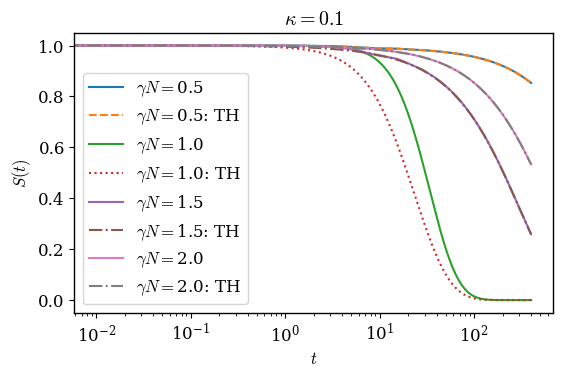

In [244]:
fig= plt.figure(figsize = (3.41667*1.4,2*1.4))
ax = fig.add_axes([0, 0, 1, 1])
plt.plot(np.arange(m)*dt,s_prob[0],label = f'$\\gamma N=${gamma[0]*N}')
plt.plot(np.arange(m)*dt,S_1,'--',label = f'$\\gamma N=${gamma[0]*N}: TH')


plt.plot(np.arange(m)*dt,s_prob[1],label = f'$\\gamma N=${gamma[1]*N}')
plt.plot(np.arange(m)*dt,S_2,':',label = f'$\\gamma N=${gamma[1]*N}: TH')

plt.plot(np.arange(m)*dt,s_prob[2],label = f'$\\gamma N=${gamma[2]*N}')
plt.plot(np.arange(m)*dt,S_3,'-.',label = f'$\\gamma N=${gamma[2]*N}: TH')

plt.plot(np.arange(m)*dt,s_prob[3],label = f'$\\gamma N=${gamma[3]*N}')
plt.plot(np.arange(m)*dt,S_4,'-.',label = f'$\\gamma N=${gamma[3]*N}: TH')


plt.legend(frameon =True,loc = 'lower left')
plt.xlabel(r'$t$')
plt.ylabel(r'$S(t)$')
plt.xscale('log')
plt.title(f'$\kappa = {kappa}$')
#plt.savefig(f'../Figures/Presentation/surv_prob_kappa{kappa}_new.pdf',bbox_inches = 'tight', dpi = 600, transparent = True)
plt.show()

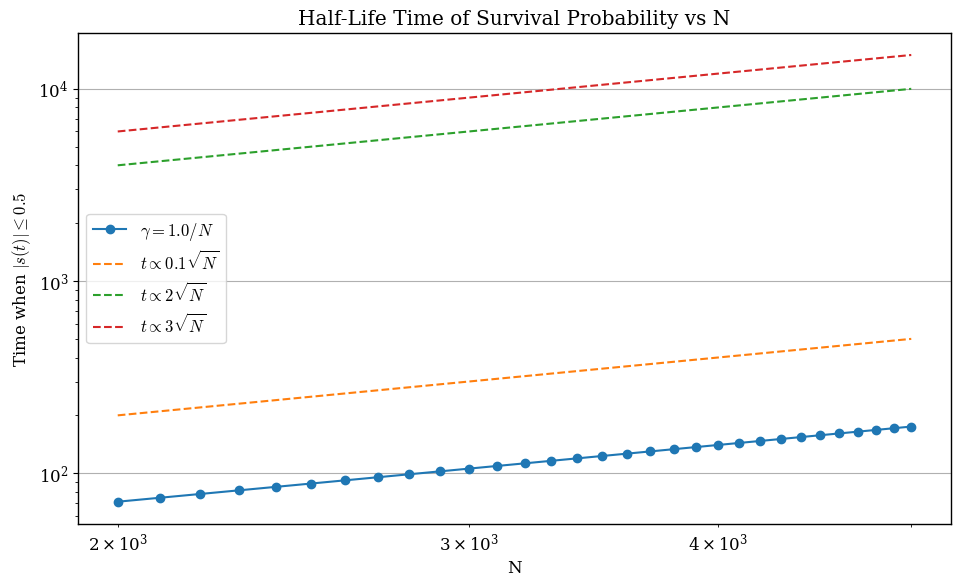

In [270]:
import numpy as np
import matplotlib.pyplot as plt

# Time grid
dt = 0.01
t_vals = np.arange(0, 400, dt)

# Parameters
kappa = 0.1
Ns = np.arange(2000, 5001, 100)
gamma_fractions = [ 1.0]  # gamma = fraction / N

def find_transition_point(arr, dt): 
    idx = np.where(arr <= 0.5)[0]
    return idx[0] * dt if len(idx) > 0 else np.nan

# Assume surv_prob_theory(N, gamma, kappa, t) is already defined

plt.figure(figsize=(10, 6))

for frac in gamma_fractions:
    times = []
    for N in Ns:
        gamma = frac / N
        s_vals = np.array([np.abs(surv_prob_theory(N, gamma, kappa, t)) for t in t_vals])
        t_half = find_transition_point(s_vals, dt)
        times.append(t_half)
    plt.plot(Ns, times, marker='o', label=fr'$\gamma = {frac}/N$')

# Add sqrt(N) scaling lines for visual comparison
for c in [0.1, 2, 3]:
    plt.plot(Ns, c * Ns, linestyle='--', label=fr'$t \propto {c}\sqrt{{N}}$')

plt.xlabel('N')
plt.ylabel('Time when $|s(t)| \leq 0.5$')
plt.title('Half-Life Time of Survival Probability vs N')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.loglog()
plt.show()